## Exercise

You learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a callback-like function in PyTorch to stop training
class EarlyStoppingCallback:
    def __init__(self, threshold=0.99):
        self.threshold = threshold

    def check_early_stop(self, accuracy):
        if accuracy > self.threshold:
            print("Short cutting cos I am happy with the performance")
            return True
        return False

callback = EarlyStoppingCallback()

In [3]:
# Define the neural network model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

In [4]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:01<00:00, 5114662.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 134424.20it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1276960.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4255199.64it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Initialize the model, loss function, and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate accuracy on the training set
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in train_loader:
            output = model(images)
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy}")

    # Check if early stopping is needed
    if callback.check_early_stop(accuracy):
        print("Finished training early")
        break

Epoch 1, Loss: 0.3751685497229859, Accuracy: 0.92995
Epoch 2, Loss: 0.1884731217972569, Accuracy: 0.94915
Epoch 3, Loss: 0.13761250492233013, Accuracy: 0.9632333333333334
Epoch 4, Loss: 0.11117196546198288, Accuracy: 0.9715833333333334
Epoch 5, Loss: 0.09616758461708008, Accuracy: 0.9782833333333333
Epoch 6, Loss: 0.08410349896878623, Accuracy: 0.9766666666666667
Epoch 7, Loss: 0.07406085632768258, Accuracy: 0.97805
Epoch 8, Loss: 0.06745548133598343, Accuracy: 0.9814166666666667
Epoch 9, Loss: 0.06001196842407808, Accuracy: 0.98505
Epoch 10, Loss: 0.0569628007066593, Accuracy: 0.9860833333333333


## Visualising the Data

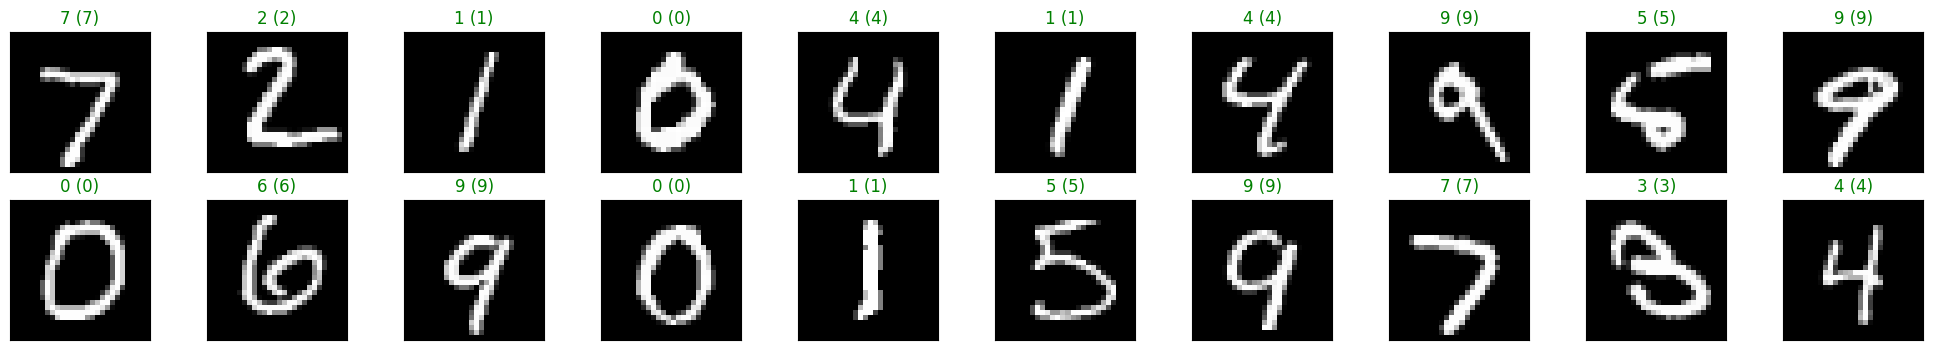

In [11]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model (images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap="gray")
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))